<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/china/blob/main/covid_19_kfold_and_random_forest_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
covid = pd.read_csv("/content/drive/MyDrive/중국/COVID19/Covid Data.csv")
covid.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU  
0               2        2              2        2                     3   97  
1               2        1              1        2                     5   97  
2               2        2              2        2                     3    2  
3               2        2              2        2                     7   97  
4               2        2              2        2                     3   97  

[5 rows x 21 columns]

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
covid.nunique()

USMER                     2
MEDICAL_UNIT             13
SEX                       2
PATIENT_TYPE              2
DATE_DIED               401
INTUBED                   4
PNEUMONIA                 3
AGE                     121
PREGNANT                  4
DIABETES                  3
COPD                      3
ASTHMA                    3
INMSUPR                   3
HIPERTENSION              3
OTHER_DISEASE             3
CARDIOVASCULAR            3
OBESITY                   3
RENAL_CHRONIC             3
TOBACCO                   3
CLASIFFICATION_FINAL      7
ICU                       4
dtype: int64

In [6]:
temp = covid.copy()
temp[temp["DATE_DIED"] == "9999-99-99"] = 1
temp[temp["DATE_DIED"] != "9999-99-99"] = 0
covid.DATE_DIED = temp.DATE_DIED

In [7]:
covid.DATE_DIED = pd.to_numeric(covid.DATE_DIED)

# Exploratory Data Analysis

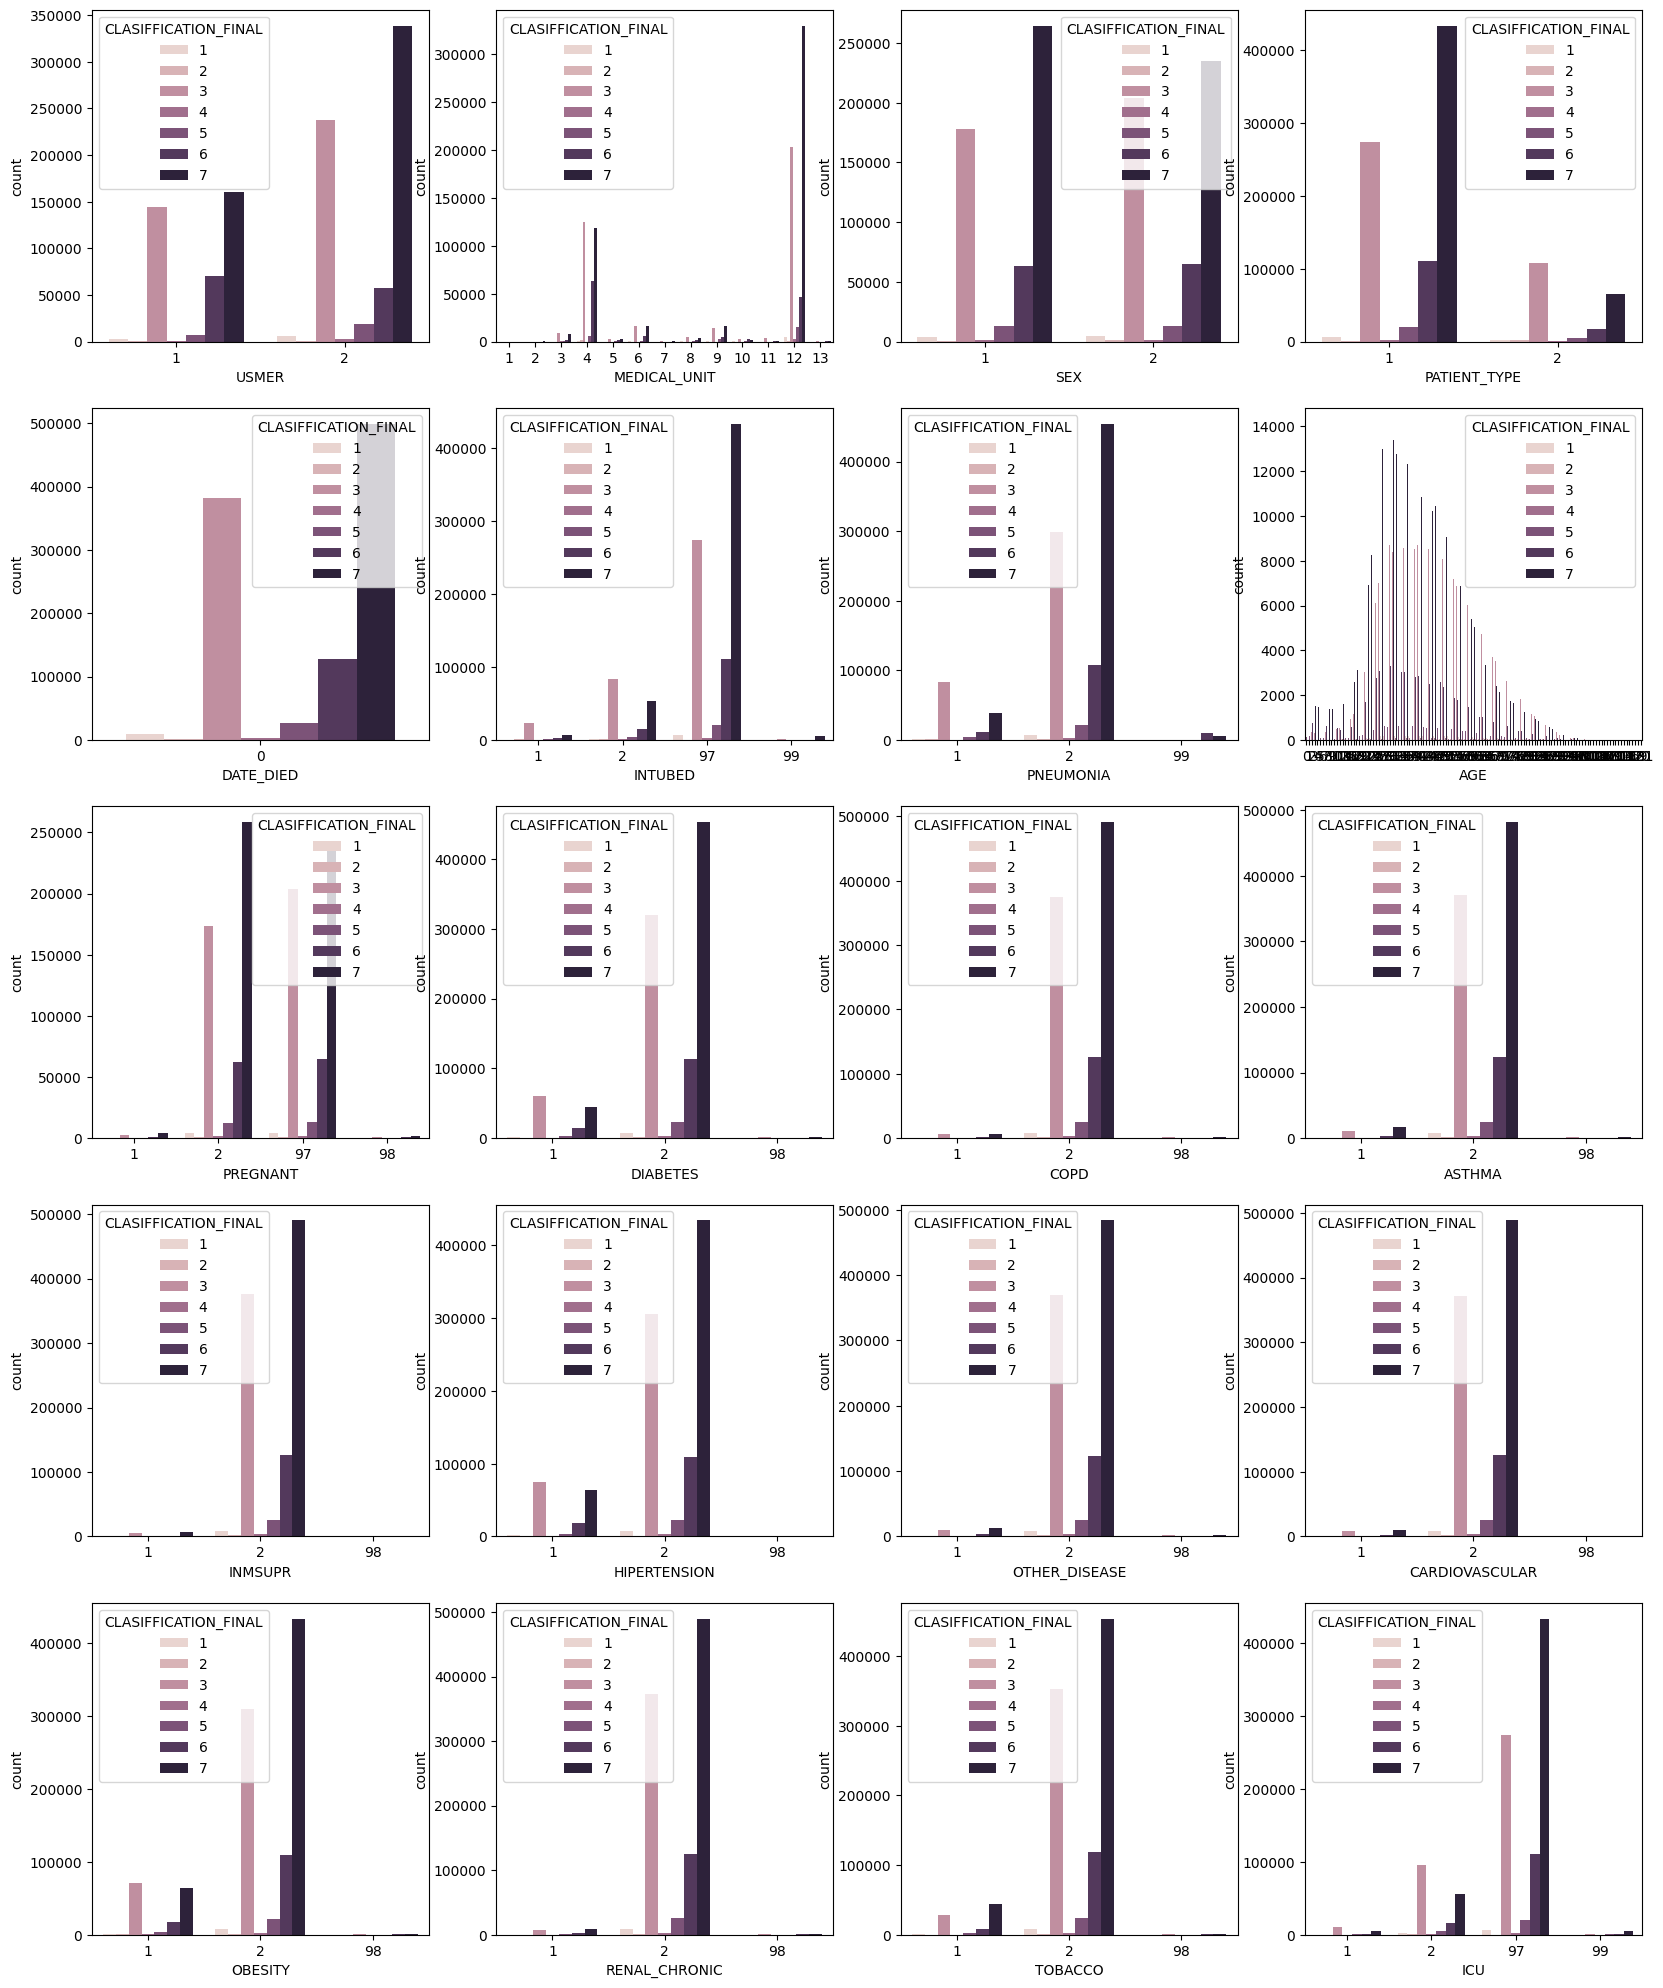

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 25))
index = 1
temp = covid.drop("CLASIFFICATION_FINAL", axis = 1)

for i in temp.columns:
    plt.subplot(5, 4, index)
    sns.countplot(data=covid, x=i, hue="CLASIFFICATION_FINAL")
    index += 1
plt.show()

# Model Training

## 1. Random Forest Classifier

In [9]:
X = covid.drop("CLASIFFICATION_FINAL", axis = 1)
y = covid.CLASIFFICATION_FINAL

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_jobs=-1)

for i in range(2, 12):
    kfold = KFold(n_splits=i)
    for train, test in kfold.split(X, y):
        rf_classifier.fit(X.iloc[train, :], y[train])
        y_pred = rf_classifier.predict(X.iloc[test, :])
        print("KFold[{}] : {}".format(i, accuracy_score(y[test], y_pred) * 100))

KFold[2] : 39.62383270263672
KFold[2] : 26.332714715413502
KFold[3] : 42.39153136399399
KFold[3] : 8.538158929976397
KFold[3] : 0.8471497031685861
KFold[4] : 21.327972412109375
KFold[4] : 25.4119873046875
KFold[4] : 27.69775390625
KFold[4] : 2.7717696066650643
KFold[5] : 7.747657535226379
KFold[5] : 15.287890708819113
KFold[5] : 5.956178623369811
KFold[5] : 51.87659442576831
KFold[5] : 10.712633812555135
KFold[6] : 9.14381190526599
KFold[6] : 5.105771816688887
KFold[6] : 24.929762020564993
KFold[6] : 5.268879962463235
KFold[6] : 52.268227646742424
KFold[6] : 30.317231434751264
KFold[7] : 11.612382090429048
KFold[7] : 12.833367824455763
KFold[7] : 38.86059133360481
KFold[7] : 8.04827899276349
KFold[7] : 20.818980480119627
KFold[7] : 55.23111431546904
KFold[7] : 57.37269352986729
KFold[8] : 17.78564453125
KFold[8] : 31.645965576171875
KFold[8] : 22.381591796875
KFold[8] : 27.2003173828125
KFold[8] : 6.59942626953125
KFold[8] : 43.6370849609375
KFold[8] : 70.67947387695312
KFold[8] : 69.1

In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier()

kfold = KFold(n_splits=11)
for train, test in kfold.split(X, y):
    rf_classifier.fit(X.iloc[train, :], y[train])
    y_pred = rf_classifier.predict(X.iloc[test, :])
    print(accuracy_score(y[test], y_pred) * 100)

35.56884343036979
11.435615001311303
7.432467873065828
29.351167060057698
41.676370312090214
9.311303435615
7.263571990558615
34.938368738526094
84.22659323367428
81.06792551796485
80.22974036191974


In [12]:
train, test = list(kfold.split(X, y))[8]

In [13]:
X_train, y_train = X.iloc[train, :], y[train]
X_test, y_test = X.iloc[test, :], y[test]

In [14]:
rf_classifier = RandomForestClassifier(n_estimators=200)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [15]:
y_pred = rf_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred) * 100)

84.28533962758983
